In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

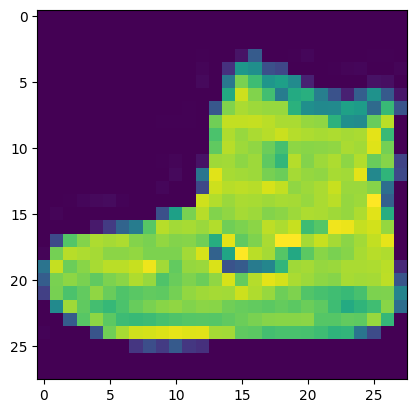

In [11]:
plt.imshow(x_train[0])

In [12]:
x_test.min(),x_test.max()

(0, 255)

In [13]:
#neural networks need data in normalized form

x_train_norm=x_train/255
x_train_norm=x_train_norm.reshape(-1,28*28)
x_test_norm=x_test/255
x_test_norm=x_test_norm.reshape(-1,28*28)

In [14]:
y_train=tf.one_hot(y_train,depth=10)
y_test=tf.one_hot(y_test,depth=10)

In [15]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
# models.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
# model.add(tf.keras.layers.Dense(50,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0002),loss=tf.losses.CategoricalCrossentropy(),metrics=["accuracy"])

In [16]:
history=model.fit(x_train_norm,y_train,epochs=2)#,callbacks=tf.keras.callbacks.LearningRateScheduler(lambda x:1e-4*10**(x/20)))

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6174 - accuracy: 0.7975
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4378 - accuracy: 0.8490


In [17]:
# plt.figure(figsize=(7,4))
# plt.semilogx(1e-4*10**(tf.range(50)/20),history.history["loss"])
# plt.xlabel("Learning Rate")
# plt.ylabel("loss")

In [18]:
model.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4843 - accuracy: 0.8318


[0.48428666591644287, 0.8317999839782715]

In [19]:
y_pred=model.predict(x_test_norm)

313/313 [==============================] - 0s 735us/step


In [20]:
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.98      0.95      0.96      1000
           2       0.61      0.84      0.71      1000
           3       0.88      0.82      0.85      1000
           4       0.65      0.79      0.72      1000
           5       0.97      0.91      0.93      1000
           6       0.77      0.35      0.48      1000
           7       0.90      0.92      0.91      1000
           8       0.94      0.95      0.94      1000
           9       0.92      0.95      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [22]:
import itertools

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=8):
    cm=confusion_matrix(y_true,y_pred)
    cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    n_classes=cm.shape[0]

    fig,ax=plt.subplots(figsize=figsize) 
    cax=ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",xlabel="Predicted Label",ylabel="True Label",
        xticks=np.arange(n_classes),yticks=np.arange(n_classes),
        xticklabels=labels,yticklabels=labels)

    ax.title.set_size(20)

    threshold=(cm.max()+cm.min())/2

    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                size=text_size)


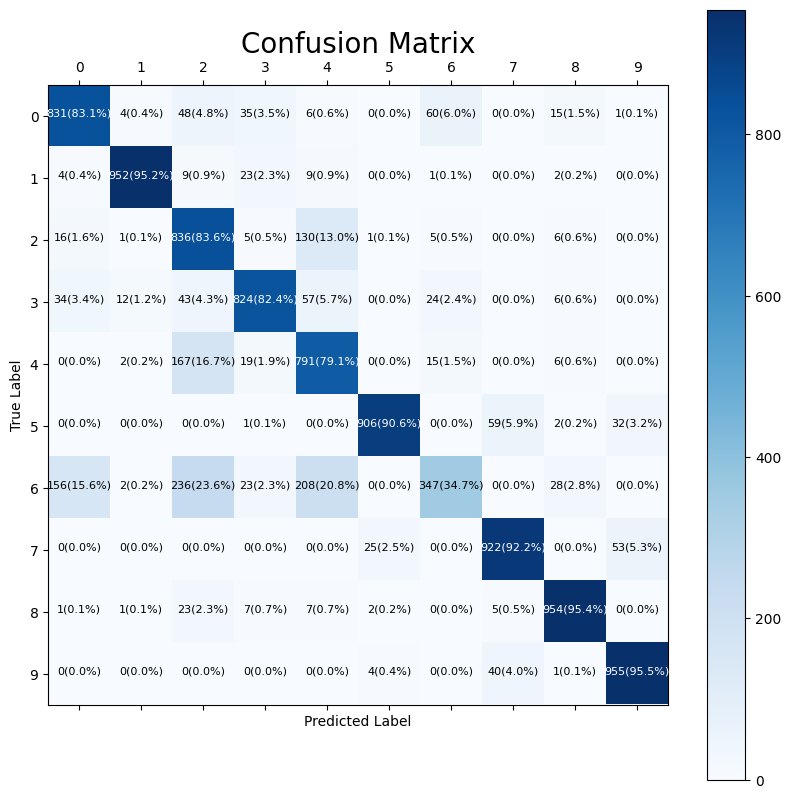

In [23]:
make_confusion_matrix(y_test,y_pred)